In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import string

from os.path import join, isdir, isfile

In [3]:
# read performance measures for jonathan's
jperf = pd.read_csv('anTraX_jonathan_performance.csv')

# read performance measures for benchmark data
dperf = pd.read_csv('anTraX_benchmark_performance.csv')

# read classifier generalization analyss results
cgen = pd.read_csv('anTraX_classifier_generalization.csv')

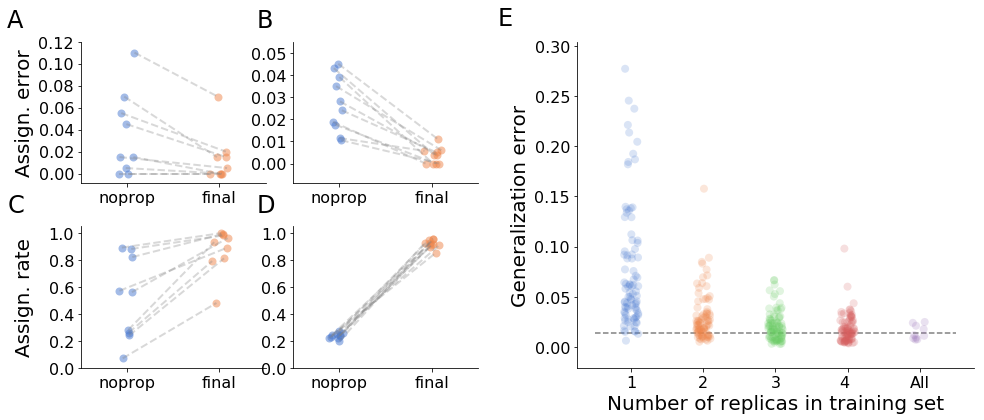

In [9]:
colortype = 'muted'

colors = sns.color_palette(colortype, 2)

fig = plt.figure(figsize=(16, 6))
outer = gridspec.GridSpec(1, 2, wspace=0.25, hspace=0.2)

inner = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=outer[0], wspace=0.15, hspace=0.3)

axs = []
for j in range(4):
    axs.append(plt.Subplot(fig, inner[j]))
    axs[j].spines['top'].set_visible(False)
    axs[j].spines['right'].set_visible(False)    
    fig.add_subplot(axs[j])
    
axs.append(plt.Subplot(fig, outer[1]))
axs[4].spines['top'].set_visible(False)
axs[4].spines['right'].set_visible(False)    
fig.add_subplot(axs[4])    


axs[0].text(-0.4, 1.1,  'A', transform=axs[0].transAxes, size=24, weight='normal')
axs[1].text(-0.2, 1.1,  'B', transform=axs[1].transAxes, size=24, weight='normal')
axs[2].text(-0.4, 1.1,  'C', transform=axs[2].transAxes, size=24, weight='normal')
axs[3].text(-0.2, 1.1,  'D', transform=axs[3].transAxes, size=24, weight='normal')
axs[4].text(-0.2, 1.05, 'E', transform=axs[4].transAxes, size=24, weight='normal')
        
########

x = pd.DataFrame(np.random.normal(loc=0, scale=0.05, size=dperf.shape), columns=dperf.columns,index=dperf.index)
x['assignment_rate_final'] += 1
x['assignment_error_final'] += 1


axs[0].plot(x['assignment_error_noprop'], dperf['assignment_error_noprop'], 'o', alpha=.5, zorder=2, ms=8, mew=0, mfc=colors[0])
axs[0].plot(x['assignment_error_final'], dperf['assignment_error_final'], 'o', alpha=.5, zorder=2, ms=8, mew=0, mfc=colors[1])

for idx in dperf.index:
    axs[0].plot(x.loc[idx,['assignment_error_noprop','assignment_error_final']], dperf.loc[idx,['assignment_error_noprop','assignment_error_final']], color = 'gray', linewidth = 2, linestyle = '--',alpha = .3)
    
    
axs[0].set_xlim((-0.5,1.5))    
axs[0].set_xticks([0,1])
axs[0].set_xticklabels(['noprop','final'])
axs[0].set_ylim((-0.009,0.12))

 
axs[2].plot(x['assignment_rate_noprop'], dperf['assignment_rate_noprop'], 'o', alpha=.5, zorder=2, ms=8, mew=0, mfc=colors[0])
axs[2].plot(x['assignment_rate_final'], dperf['assignment_rate_final'], 'o', alpha=.5, zorder=2, ms=8, mew=0, mfc=colors[1])

for idx in dperf.index:
    axs[2].plot(x.loc[idx,['assignment_rate_noprop','assignment_rate_final']], dperf.loc[idx,['assignment_rate_noprop','assignment_rate_final']], color = 'gray', linewidth = 2, linestyle = '--',alpha = .3)
    
    
axs[2].set_xlim((-0.5,1.5))    
axs[2].set_xticks([0,1])
axs[2].set_xticklabels(['noprop','final'])    
axs[2].set_ylim((0,1.05))


########




x = pd.DataFrame(np.random.normal(loc=0, scale=0.05, size=jperf.shape), columns=jperf.columns,index=jperf.index)
x['assignment_rate_final'] += 1
x['assignment_error_final'] += 1


axs[1].plot(x['assignment_error_noprop'], jperf['assignment_error_noprop'], 'o', alpha=.5, zorder=2, ms=8, mew=0, mfc=colors[0])
axs[1].plot(x['assignment_error_final'], jperf['assignment_error_final'], 'o', alpha=.5, zorder=2, ms=8, mew=0, mfc=colors[1])

for idx in jperf.index:
    axs[1].plot(x.loc[idx,['assignment_error_noprop','assignment_error_final']], jperf.loc[idx,['assignment_error_noprop','assignment_error_final']], color = 'gray', linewidth = 2, linestyle = '--',alpha = .3)
    
    
axs[1].set_xlim((-0.5,1.5))    
axs[1].set_xticks([0,1])
axs[1].set_xticklabels(['noprop','final'])
axs[1].set_ylim((-0.009,0.055))

 
axs[3].plot(x['assignment_rate_noprop'], jperf['assignment_rate_noprop'], 'o', alpha=.5, zorder=2, ms=8, mew=0, mfc=colors[0])
axs[3].plot(x['assignment_rate_final'], jperf['assignment_rate_final'], 'o', alpha=.5, zorder=2, ms=8, mew=0, mfc=colors[1])

for idx in jperf.index:
    axs[3].plot(x.loc[idx,['assignment_rate_noprop','assignment_rate_final']], jperf.loc[idx,['assignment_rate_noprop','assignment_rate_final']], color = 'gray', linewidth = 2, linestyle = '--',alpha = .3)
    
    
axs[3].set_xlim((-0.5,1.5))    
axs[3].set_xticks([0,1])
axs[3].set_xticklabels(['noprop','final'])    
axs[3].set_ylim((0,1.05))




#sns.stripplot(data=dperf, x='type', y='accuracy', size=10, ax=axs[0], palette=sns.color_palette(colortype, 2),alpha=0.5, order=['noprop','final'])
#sns.stripplot(data=dperf, x='type', y='coverage', size=10, ax=axs[2], palette=sns.color_palette(colortype, 2),alpha=0.5, order=['noprop','final'])
#sns.stripplot(data=jperf, x='type', y='accuracy', size=10, ax=axs[1], palette=sns.color_palette(colortype, 2),alpha=0.5, order=['noprop','final'])
#sns.stripplot(data=jperf, x='type', y='coverage', size=10, ax=axs[3], palette=sns.color_palette(colortype, 2),alpha=0.5, order=['noprop','final'])


for axx in axs[:-1]:
    axx.set_xlabel('')
    
axs[0].set_ylabel('Assign. error', fontsize=14)
axs[2].set_ylabel('Assign. rate', fontsize=14)
#axs[2].set_xlabel('benchmark', fontsize=20)
axs[1].set_ylabel('')
axs[3].set_ylabel('')
#axs[3].set_xlabel('jonathan', fontsize=20)
        

#axs[0].set_xticklabels(['',''])
#axs[1].set_xticklabels(['',''])

#axs[1].set_yticks([])
#axs[3].set_yticks([])



########

sns.stripplot(x=cgen['nreplicas'], y=cgen['err'], size=8, palette=sns.color_palette(colortype, 5),alpha=0.2, ax=axs[4])
y = cgen[cgen.nreplicas==10].err.mean()
axs[4].plot([-0.5,4.5],[y,y], color='grey', linestyle='dashed')

axs[4].set_xlabel('Number of replicas in training set', fontsize=20)
axs[4].set_ylabel('Generalization error', fontsize=30)

axs[4].set_xticklabels(['1','2','3','4 ','All'], fontsize=14)



for a in axs:
    for item in [a.xaxis.label, a.yaxis.label]:
        item.set_fontsize(20)
    for item in a.get_xticklabels() + a.get_yticklabels():
        item.set_fontsize(16)

fig.align_ylabels([axs[0],axs[2]])
                
fig.savefig('Figure4.png', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.25,
        frameon=None, metadata=None)